In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\SIDDHARTH\OneDrive\Documents\JOB PROFILES\Data Science\Machine Learning\data files\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## DATA CLEANING

In [3]:
df_copy = df.copy()

In [4]:
df_copy.drop(columns= ['society', 'availability'], inplace= True)

In [5]:
df_copy.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [6]:
df_copy['balcony'] = df_copy['balcony'].fillna(df_copy['balcony'].median())

In [7]:
df_copy['bath'] = df_copy['bath'].fillna(df_copy['bath'].median())

In [8]:
df_copy['BHK'] = df_copy['size'].apply(lambda x : str(x).split(" ")[0])

In [9]:
df_copy.drop(columns= 'size', inplace= True)

In [10]:
df_copy

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453,4.0,0.0,231.00,5
13316,Super built-up Area,Richards Town,3600,5.0,2.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689,4.0,1.0,488.00,4


In [11]:
df_copy['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [13]:
df_copy[~df_copy['total_sqft'].apply(is_float)].head(10)

,area_type,location,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,Devanahalli,3010 - 3410,2.0,2.0,192.000,4
81,Built-up Area,Hennur Road,2957 - 3450,2.0,2.0,224.500,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,Devanahalli,1520 - 1740,2.0,2.0,74.820,3
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


In [14]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try: 
        return float(x)
    except:
        return None

In [15]:
df_copy['total_sqft'] = df_copy['total_sqft'].apply(convert_sqft_to_num)

In [16]:
df_copy

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5
13316,Super built-up Area,Richards Town,3600.0,5.0,2.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [17]:
df_copy['price_per_sqft'] = df_copy['price']*100000/df_copy['total_sqft']
df_copy

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Super built-up Area,Richards Town,3600.0,5.0,2.0,400.00,4,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [18]:
len(df_copy['location'].unique())

1306

In [19]:
df_copy['location'] = df_copy['location'].apply( lambda x: str(x).strip())

In [20]:
location_stats = df_copy.groupby('location')['location'].agg('count').sort_values(ascending= False)
location_stats

location
Whitefield               541
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1295, dtype: int64

In [21]:
len(location_stats[location_stats <= 10])

1054

In [22]:
location_stats_less_than_10 = location_stats[location_stats <= 10]

In [23]:
df_copy['location'] = df_copy['location'].apply(lambda x : 'other' if x in location_stats_less_than_10 else x )

#### OUTLIER REMOVAL

In [24]:
df_copy['BHK'] = df_copy['BHK'].apply( lambda x: str(x).strip())

In [25]:
df_copy['BHK'] = df_copy['BHK'].apply(lambda x : float(x))

In [26]:
df_copy[df_copy['total_sqft']/df_copy['BHK'] < 300]

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
9,Plot Area,other,1020.0,6.0,2.0,370.0,6.0,36274.509804
45,Plot Area,HSR Layout,600.0,9.0,2.0,200.0,8.0,33333.333333
58,Plot Area,Murugeshpalya,1407.0,4.0,1.0,150.0,6.0,10660.980810
68,Plot Area,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8.0,6296.296296
70,Plot Area,other,500.0,3.0,2.0,100.0,3.0,20000.000000
...,...,...,...,...,...,...,...,...
13277,Plot Area,other,1400.0,7.0,2.0,218.0,7.0,15571.428571
13279,Plot Area,other,1200.0,5.0,2.0,130.0,6.0,10833.333333
13281,Plot Area,Margondanahalli,1375.0,5.0,1.0,125.0,5.0,9090.909091
13303,Plot Area,Vidyaranyapura,774.0,5.0,3.0,70.0,5.0,9043.927649


In [27]:
df_copy = df_copy[~(df_copy['total_sqft']/df_copy['BHK'] < 300)]
df_copy.shape

(12576, 8)

In [28]:
df_copy['price_per_sqft'].describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [29]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        reduced_df  = subdf[(subdf['price_per_sqft'] > (m-st)) & (subdf['price_per_sqft'] <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index= True)
    return df_out 



In [30]:
df_copy = remove_pps_outliers(df_copy)

In [31]:
df_copy.shape

(10301, 8)

In [32]:
import matplotlib.pyplot as plt

In [33]:
def plot_scatter_chart(df_copy,location):
    bhk2 = df_copy[(df_copy['location'] == location) & (df_copy['BHK'] == 2)]
    bhk3 = df_copy[(df_copy['location'] == location) & (df_copy['BHK'] == 3)]
    plt.rcParams['figure.figsize'] == (15,10)
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3['total_sqft'], bhk3['price'], marker ='+', color= 'green', label = '3 BHK', s=50)
    plt.xlabel("Total Square feet area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    plt.show()

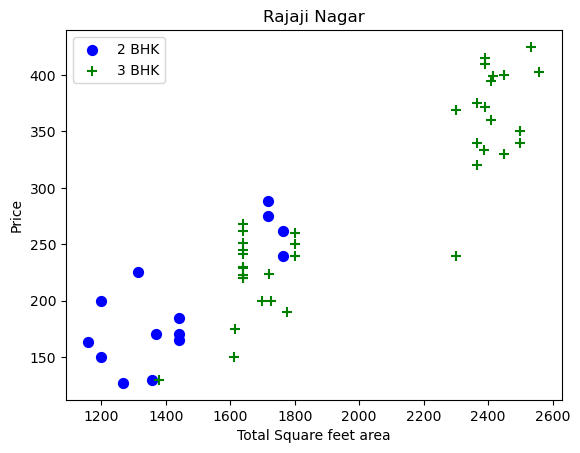

In [34]:
plot_scatter_chart(df_copy, "Rajaji Nagar")

In [35]:
def remove_bhk_outliers(df_copy):
    exclude_indices = np.array([])
    for location, location_df in df_copy.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df['price_per_sqft']),
                'std' : np.std(bhk_df['price_per_sqft']),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk - 1)
            if stats:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft'] < (stats['mean'])].index.values)
    return df_copy.drop(exclude_indices, axis = 'index')

In [36]:
df_copy = remove_bhk_outliers(df_copy)

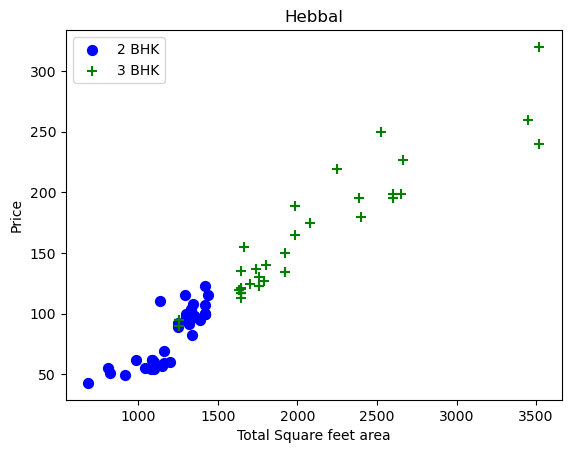

In [37]:
plot_scatter_chart(df_copy, "Hebbal")

In [38]:
df_copy.bath.unique()

array([ 4.,  2.,  3.,  8.,  5.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

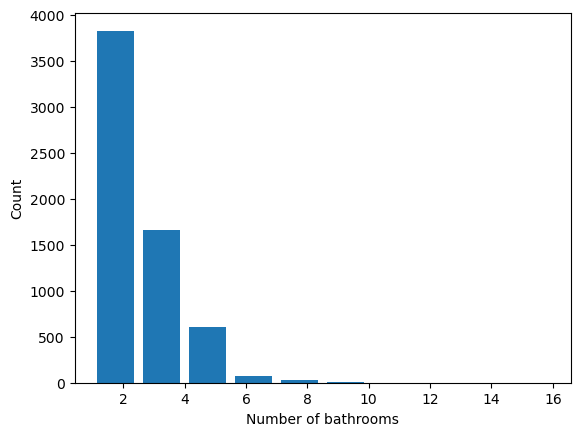

In [39]:
plt.hist(df_copy['bath'], rwidth= 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [40]:
df_copy[df_copy['bath'] >  df_copy['BHK']+2]

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
5274,Built-up Area,Nagasandra,7000.0,8.0,2.0,450.0,4.0,6428.571429
6759,Super built-up Area,Thanisandra,1806.0,6.0,2.0,116.0,3.0,6423.034330
8468,Super built-up Area,other,11338.0,9.0,1.0,1000.0,6.0,8819.897689


In [41]:
df_copy = df_copy[df_copy['bath'] < df_copy['BHK']+2]

In [42]:
df_copy.drop(columns= 'price_per_sqft', inplace= True)

In [43]:
df_copy

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4.0
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3.0
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2.0
5,Super built-up Area,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4.0
6,Super built-up Area,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4.0
...,...,...,...,...,...,...,...
10292,Carpet Area,other,1200.0,2.0,3.0,70.0,2.0
10293,Super built-up Area,other,1800.0,1.0,1.0,200.0,1.0
10296,Super built-up Area,other,1353.0,2.0,2.0,110.0,2.0
10297,Plot Area,other,812.0,1.0,0.0,26.0,1.0


## MODEL BUILDING

In [44]:
dummies_area = pd.get_dummies(df_copy['area_type'], dtype= int)

In [45]:
dummies_area.columns

Index(['Built-up  Area', 'Carpet  Area', 'Plot  Area', 'Super built-up  Area'], dtype='object')

In [46]:
df2 = pd.concat([df_copy, dummies_area.drop(columns= 'Carpet  Area')], axis= 'columns')

In [47]:
dummies_location = pd.get_dummies(df_copy['location'], dtype= int)

In [48]:
dummies_location

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
df3 = pd.concat([df2, dummies_location.drop(columns= 'other')], axis= 'columns')

In [50]:
df3.drop(columns= ['area_type', 'location'], inplace= True)

In [51]:
df3

,total_sqft,bath,balcony,price,BHK,Built-up Area,Plot Area,Super built-up Area,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,0.0,413.0,4.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,2.0,368.0,4.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292,1200.0,2.0,3.0,70.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10293,1800.0,1.0,1.0,200.0,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10296,1353.0,2.0,2.0,110.0,2.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10297,812.0,1.0,0.0,26.0,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
x = df3.drop(columns= 'price')
y = df3['price']

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8689650919695995

In [55]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

k_fold = ShuffleSplit(n_splits= 5, test_size= 0.2)
cross_val_score(LinearRegression(), x, y , cv = k_fold)

array([-2.73681564e+15,  8.65183325e-01,  8.00780158e-01,  8.55144904e-01,
        8.64247264e-01])

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_algo_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params': {
            }
        },
        'lasso' : {
            'model' :  Lasso(),
            'params': {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best','random']
            }
        }
    }
    scores = []
    k_fold = ShuffleSplit(n_splits=5, test_size= 0.2)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv = k_fold, return_train_score = False)
        gs.fit(x,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    
    return pd.DataFrame(scores, columns= ['model','best_score', 'best_params'])

In [57]:
find_best_algo_using_gridsearchcv(x,y)

c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\SIDDHARTH\anaconda

,model,best_score,best_params
0,linear_regression,-7.338359e+16,{}
1,lasso,7.199798e-01,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,6.889862e-01,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [58]:
def predict_price(total_sqft, bath, balcony, BHK, location, area_type):
    loc_index = np.where(x.columns == location)[0][0]
    area_index  = np.where(x.columns== area_type)[0][0]

    X_use = np.zeros(len(x.columns))
    X_use[0] = total_sqft
    X_use[1] = bath
    X_use[2] = balcony
    X_use[3] = BHK

    if loc_index >= 0:
        X_use[loc_index] = 1
    if area_index >= 0:
        X_use[area_index] = 1
    
    return model.predict([X_use])[0]

In [59]:
x.columns

Index(['total_sqft', 'bath', 'balcony', 'BHK', 'Built-up  Area', 'Plot  Area',
       'Super built-up  Area', '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=248)

In [60]:
predict_price(3000, 2, 2, 4 ,'Vishveshwarya Layout','Built-up  Area')

c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


158.0420644641855

in this project we manually remove the dimensions we found in excess, therefore no need for using PCA

## Loading on python flask server

In [62]:
import pickle
with open('machine_model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [63]:
import json 
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json",'w') as f:
    f.write(json.dumps(columns))